In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload() #Upload do


Saving student-mat.csv to student-mat (1).csv


In [ ]:
#cleaning data
df = pd.read_csv('student-mat.csv')
df = df.drop(['school', 'sex', 'famsize', 'Mjob', 'Fjob', 'reason', 'paid', 'nursery', 'age', 'guardian', 'higher', 'internet', 'romantic', 'address', 'Pstatus' ], axis = 1)

df['grades'] = df['G1'].astype(int) + df['G2'].astype(int) + df['G3'].astype(int)
df = df.drop(['G1', 'G2', 'G3'], axis = 1)
df.head()
#store the cleaned data back to the file
df.to_csv('cleaned-student-mat.csv', index=False)

In [ ]:
#create dictionary
import csv
data_dict = {}
with open('cleaned-student-mat.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        for key, value in row.items():
            if key not in data_dict:
                data_dict[key] = []
            data_dict[key].append(value)
print(data_dict)

{'Medu': ['4', '1', '1', '4', '3', '4', '2', '4', '3', '3', '4', '2', '4', '4', '2', '4', '4', '3', '3', '4', '4', '4', '4', '2', '2', '2', '2', '4', '3', '4', '4', '4', '4', '3', '3', '2', '4', '4', '3', '2', '2', '4', '4', '2', '2', '4', '3', '4', '4', '4', '2', '4', '4', '4', '3', '2', '4', '4', '1', '4', '4', '1', '1', '4', '4', '4', '4', '3', '2', '3', '3', '4', '1', '3', '3', '4', '4', '2', '2', '3', '2', '2', '3', '2', '1', '4', '2', '4', '2', '4', '3', '4', '3', '4', '2', '1', '4', '2', '4', '4', '4', '4', '4', '3', '3', '3', '2', '3', '4', '4', '4', '3', '2', '4', '2', '4', '4', '3', '1', '3', '1', '2', '2', '4', '2', '3', '3', '0', '2', '4', '3', '1', '2', '3', '3', '4', '3', '3', '1', '4', '4', '2', '4', '1', '2', '1', '3', '1', '4', '2', '1', '2', '3', '3', '4', '2', '1', '1', '2', '3', '2', '3', '1', '1', '1', '3', '2', '4', '2', '4', '3', '1', '4', '1', '3', '4', '2', '3', '4', '4', '4', '3', '2', '3', '3', '3', '1', '2', '3', '1', '2', '1', '1', '3', '2', '2', '4', '3', 

In [ ]:
#calculating correlation coefficient
import scipy.stats as stats
list = []
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    corr, p = stats.pearsonr(df['grades'], df[column])
    list += [corr]
print(list)

[0.22425986840612736, 0.17585213510215633, -0.12819716282790067, 0.13456471886640672, -0.3757588959269957, 0.021652520873249807, 0.0037731402826224713, -0.1545113364650492, -0.07250817752779404, -0.08802467108072594, -0.08038037598606068, -0.0059088061323030105, 1.0]


In [ ]:
#updating the dictionary
data_dict.update({'corr': list})
print(data_dict)

{'Medu': ['4', '1', '1', '4', '3', '4', '2', '4', '3', '3', '4', '2', '4', '4', '2', '4', '4', '3', '3', '4', '4', '4', '4', '2', '2', '2', '2', '4', '3', '4', '4', '4', '4', '3', '3', '2', '4', '4', '3', '2', '2', '4', '4', '2', '2', '4', '3', '4', '4', '4', '2', '4', '4', '4', '3', '2', '4', '4', '1', '4', '4', '1', '1', '4', '4', '4', '4', '3', '2', '3', '3', '4', '1', '3', '3', '4', '4', '2', '2', '3', '2', '2', '3', '2', '1', '4', '2', '4', '2', '4', '3', '4', '3', '4', '2', '1', '4', '2', '4', '4', '4', '4', '4', '3', '3', '3', '2', '3', '4', '4', '4', '3', '2', '4', '2', '4', '4', '3', '1', '3', '1', '2', '2', '4', '2', '3', '3', '0', '2', '4', '3', '1', '2', '3', '3', '4', '3', '3', '1', '4', '4', '2', '4', '1', '2', '1', '3', '1', '4', '2', '1', '2', '3', '3', '4', '2', '1', '1', '2', '3', '2', '3', '1', '1', '1', '3', '2', '4', '2', '4', '3', '1', '4', '1', '3', '4', '2', '3', '4', '4', '4', '3', '2', '3', '3', '3', '1', '2', '3', '1', '2', '1', '1', '3', '2', '2', '4', '3', 

<ipython-input-23-ecd9ca75c4a9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


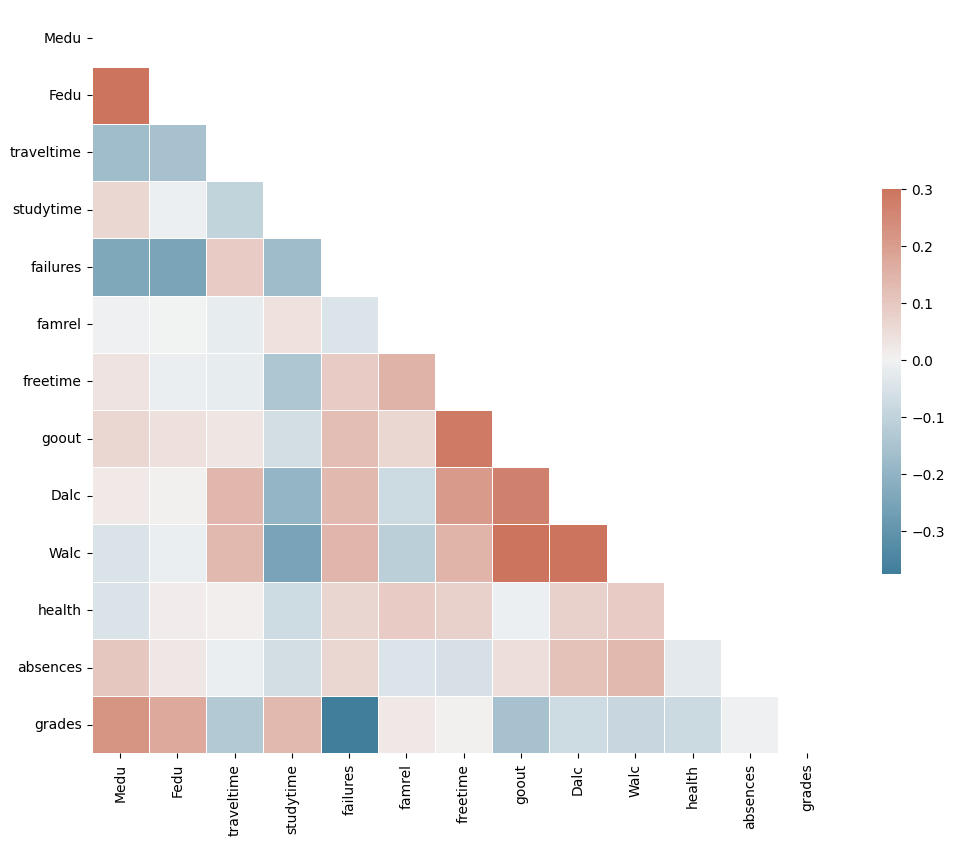

In [ ]:
#creating heatmap
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
#mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
#plot size figure
f, ax = plt.subplots(figsize=(12, 10))
#setting up colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#drawing the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#shows how each factor affect each other

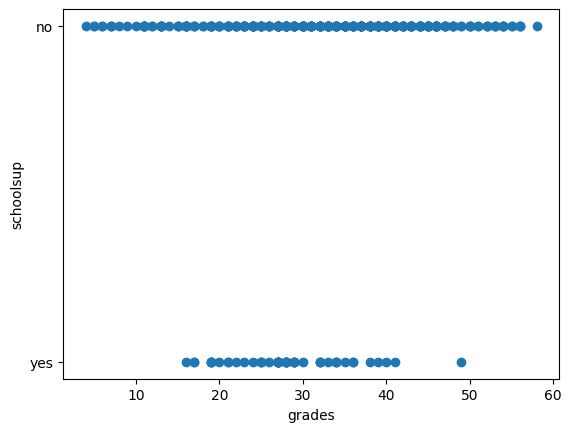

In [ ]:
plt.scatter(df['grades'], df['schoolsup'])
# Set the x-axis label
plt.xlabel('grades')

# Set the y-axis label
plt.ylabel('schoolsup')

# Show the bar graph
plt.show()

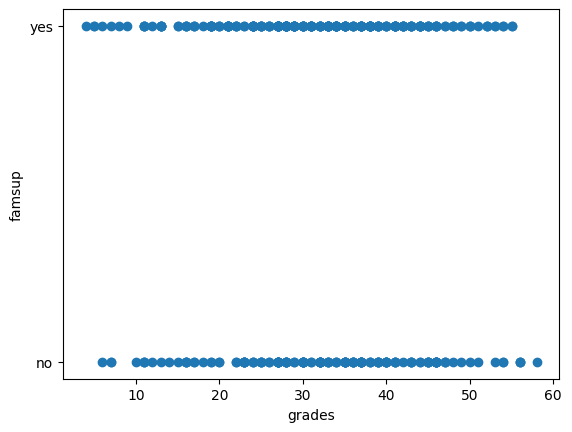

In [ ]:
plt.scatter(df['grades'], df['famsup'])
# Set the x-axis label
plt.xlabel('grades')

# Set the y-axis label
plt.ylabel('famsup')

# Show the bar graph
plt.show()

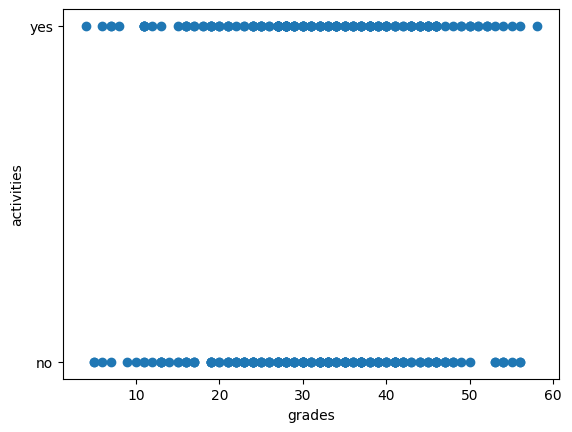

In [ ]:
plt.scatter(df['grades'], df['activities'])
# Set the x-axis label
plt.xlabel('grades')

# Set the y-axis label
plt.ylabel('activities')

# Show the bar graph
plt.show()